In [28]:
# Data and analysis libraries
import polars as pl                         # Fast dataframes for financial data
import numpy as np                          # Numerical computing library
from datetime import datetime, timedelta    # Date and time operations
import random


# Machine learning libraries  
import torch                                # PyTorch framework
import torch.nn as nn                       # Neural network modules
import torch.optim as optim                 # Optimization algorithms              

# Model building and training utilities
import research_v1 as r1 # Custom research module for crypto analysis
import research_v2 as r2 # Custom research module for stock analysis

# Visualization and 
import altair as alt                        # Interactive visualization library  

# Crypt and stock data
import yfinance as yf                       # Yahoo Finance data retrieval
import yfinance_functions as yff            # Yahoo Finance helper functions

import tqdm
from matplotlib import pyplot as plt

# # Other Financial data APIs
# import os
# from dotenv import load_dotenv
# from datetime import datetime
# import finnhub

In [2]:
r1.set_seed(17)
r2.set_seed(17)

In [49]:
# Stock Symbols
syms = yff.SYMBOL_STOCKS

# Configuration
time_interval = '1h'
max_lags = 4
forecast_horizon = 1
annualized_rate = r2.sharpe_annualization_factor(time_interval, 252, 6.5)
start_date = datetime(2024, 10, 29, 0, 0)
end_date = datetime(2025, 10, 31, 0, 0)

all_stock_data = yf.download(syms, start=start_date, end=end_date, interval="1h")
all_stock_data

C:\Users\ezhou\AppData\Local\Temp\ipykernel_7604\3089855026.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_stock_data = yf.download(syms, start=start_date, end=end_date, interval="1h")
[*********************100%***********************]  6 of 6 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN       GOOGL        MSFT   
Datetime                                                                    
2024-10-29 13:30:00+00:00  233.059998  188.479996  167.630005  428.222290   
2024-10-29 14:30:00+00:00  233.270004  189.490005  168.854996  429.529999   
2024-10-29 15:30:00+00:00  233.100006  189.449997  168.490005  430.019989   
2024-10-29 16:30:00+00:00  233.889999  190.490005  169.509995  431.170013   
2024-10-29 17:30:00+00:00  233.970001  190.919998  169.830002  432.399994   
...                               ...         ...         ...         ...   
2025-10-30 15:30:00+00:00  272.010010  226.119995  286.000000  526.655029   
2025-10-30 16:30:00+00:00  271.950012  225.419998  285.399994  526.872620   
2025-10-30 17:30:00+00:00  271.750000  225.089996  283.375000  523.684998   
2025-10-30 18:30:00+00:00  271.339996  224.391006  283.410004  523.820007   
2025-10-30 19:30:00+00:00  271.260010  222.830002  281.385010  525.780029   

Price                                                    High              \
Ticker                           NVDA        TSLA        AAPL        AMZN   
Datetime                                                                    
2024-10-29 13:30:00+00:00  140.330002  261.049988  234.054993  189.225006   
2024-10-29 14:30:00+00:00  141.038895  259.880005  233.690002  189.770004   
2024-10-29 15:30:00+00:00  141.680099  257.320099  233.589996  189.942200   
2024-10-29 16:30:00+00:00  141.485001  258.591492  234.210007  190.669998   
2024-10-29 17:30:00+00:00  141.699997  259.100586  234.139999  191.059998   
...                               ...         ...         ...         ...   
2025-10-30 15:30:00+00:00  203.429901  445.139893  272.390015  227.979996   
2025-10-30 16:30:00+00:00  203.054993  445.879913  272.067810  226.360001   
2025-10-30 17:30:00+00:00  203.590500  442.768005  272.299988  225.939102   
2025-10-30 18:30:00+00:00  202.549896  441.945007  272.007996  225.445007   
2025-10-30 19:30:00+00:00  202.800003  440.070007  271.670013  225.080002   

Price                                              ...        Open  \
Ticker                          GOOGL        MSFT  ...       GOOGL   
Datetime                                           ...               
2024-10-29 13:30:00+00:00  168.389999  429.279999  ...  167.729996   
2024-10-29 14:30:00+00:00  169.130005  430.179901  ...  167.649994   
2024-10-29 15:30:00+00:00  168.945007  430.660004  ...  168.845001   
2024-10-29 16:30:00+00:00  169.569901  432.209991  ...  168.494995   
2024-10-29 17:30:00+00:00  169.830002  432.439911  ...  169.514999   
...                               ...         ...  ...         ...   
2025-10-30 15:30:00+00:00  290.000000  527.770020  ...  288.459991   
2025-10-30 16:30:00+00:00  286.170013  527.494995  ...  285.970001   
2025-10-30 17:30:00+00:00  285.329987  527.719971  ...  285.320007   
2025-10-30 18:30:00+00:00  284.049988  524.450012  ...  283.359985   
2025-10-30 19:30:00+00:00  283.739990  526.648621  ...  283.359985   

Price                                                           Volume  \
Ticker                           MSFT        NVDA        TSLA     AAPL   
Datetime                                                                 
2024-10-29 13:30:00+00:00  427.970001  140.250000  263.339996  6668061   
2024-10-29 14:30:00+00:00  428.250000  140.330002  261.089905  3007074   
2024-10-29 15:30:00+00:00  429.489990  141.039993  259.869995  2252024   
2024-10-29 16:30:00+00:00  430.019989  141.695999  257.368805  2623926   
2024-10-29 17:30:00+00:00  431.233185  141.500000  258.600006  1696611   
...                               ...         ...         ...      ...   
2025-10-30 15:30:00+00:00  525.344971  203.080002  442.587311  3869786   
2025-10-30 16:30:00+00:00  526.650024  203.429993  445.140015  2409548   
2025-10-30 17:30:00+00:00  526.849976  203.0599

In [4]:
# Just download and use the data directly - no reloading needed
all_data = []
for sym in tqdm.tqdm(syms, desc="Downloading stocks"):
    try:
        # Download and get the DataFrame directly
        data = r2.download_ohlc_from_yfinance(sym, time_interval, start_date, end_date)
        # Add symbol identifier
        data = data.with_columns(pl.lit(sym).alias('symbol'))
        all_data.append(data)
        print(f" {sym}: {len(data)} rows")
    except Exception as e:
        print(f" {sym} failed: {e}")

combined_ts = pl.concat(all_data)
combined_ts

 Downloaded AAPL: 1752 rows
 AAPL: 1752 rows
 Downloaded MSFT: 1752 rows
 MSFT: 1752 rows
 Downloaded GOOGL: 1752 rows
 GOOGL: 1752 rows
 Downloaded TSLA: 1752 rows
 TSLA: 1752 rows
 Downloaded AMZN: 1752 rows
 AMZN: 1752 rows
 Downloaded NVDA: 1752 rows
 NVDA: 1752 rows


datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str
2024-10-29 13:30:00,233.195007,234.054993,232.320007,233.059998,6668061,0.0,0.0,"""AAPL"""
2024-10-29 14:30:00,233.050003,233.690002,233.039993,233.270004,3007074,0.0,0.0,"""AAPL"""
2024-10-29 15:30:00,233.259995,233.589996,233.020096,233.100006,2252024,0.0,0.0,"""AAPL"""
2024-10-29 16:30:00,233.104996,234.210007,233.020004,233.889999,2623926,0.0,0.0,"""AAPL"""
2024-10-29 17:30:00,233.919998,234.139999,233.759995,233.970001,1696611,0.0,0.0,"""AAPL"""
…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA"""
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA"""
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA"""


In [39]:
median_data = combined_ts.sort(["symbol", "datetime"]).group_by_dynamic(
    "datetime", 
    every=time_interval, 
    offset="0m",
    group_by="symbol"  # Add this to group by symbol as well
).agg(
    pl.col('close').quantile(0.5).alias('price_median')
)

median_data

symbol,datetime,price_median
str,datetime[μs],f64
"""AAPL""",2024-10-29 13:00:00,233.059998
"""AAPL""",2024-10-29 14:00:00,233.270004
"""AAPL""",2024-10-29 15:00:00,233.100006
"""AAPL""",2024-10-29 16:00:00,233.889999
"""AAPL""",2024-10-29 17:00:00,233.970001
…,…,…
"""GOOGL""",2025-10-30 15:00:00,286.0
"""GOOGL""",2025-10-30 16:00:00,285.399994
"""GOOGL""",2025-10-30 17:00:00,283.375


In [51]:
rolling_median = combined_ts.with_columns(
    pl.col('close').rolling_median(window_size=5).alias('rolling_median_5h')
)
rolling_median

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return,rolling_median_5h
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64,f64
2024-10-29 13:30:00,233.195007,234.054993,232.320007,233.059998,6668061,0.0,0.0,"""AAPL""",null,null
2024-10-29 14:30:00,233.050003,233.690002,233.039993,233.270004,3007074,0.0,0.0,"""AAPL""",0.000901,null
2024-10-29 15:30:00,233.259995,233.589996,233.020096,233.100006,2252024,0.0,0.0,"""AAPL""",-0.000729,null
2024-10-29 16:30:00,233.104996,234.210007,233.020004,233.889999,2623926,0.0,0.0,"""AAPL""",0.003383,null
2024-10-29 17:30:00,233.919998,234.139999,233.759995,233.970001,1696611,0.0,0.0,"""AAPL""",0.000342,233.270004
…,…,…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA""",0.001746,203.429901
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA""",-0.001845,203.074997
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA""",0.002634,203.074997


<Figure size 1200x600 with 0 Axes>

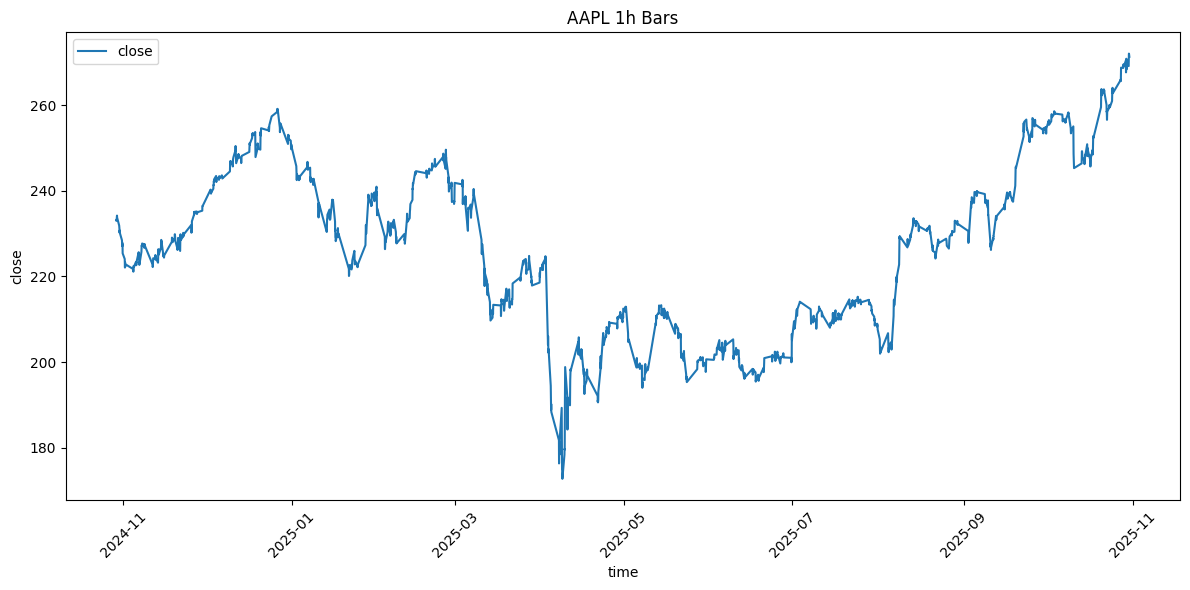

<Figure size 1200x600 with 0 Axes>

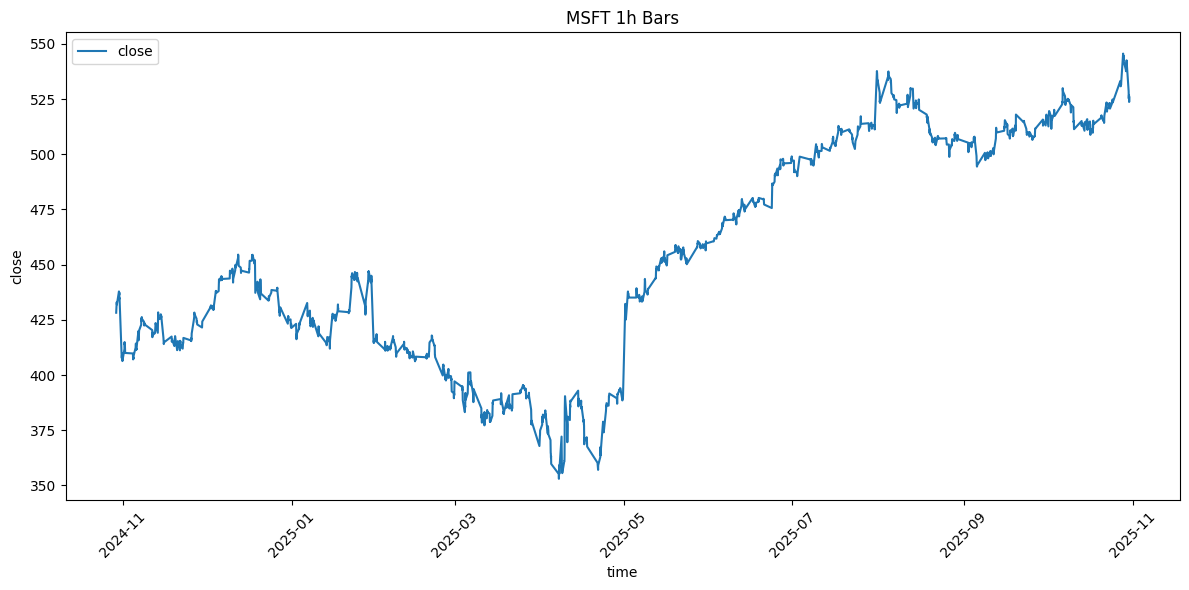

<Figure size 1200x600 with 0 Axes>

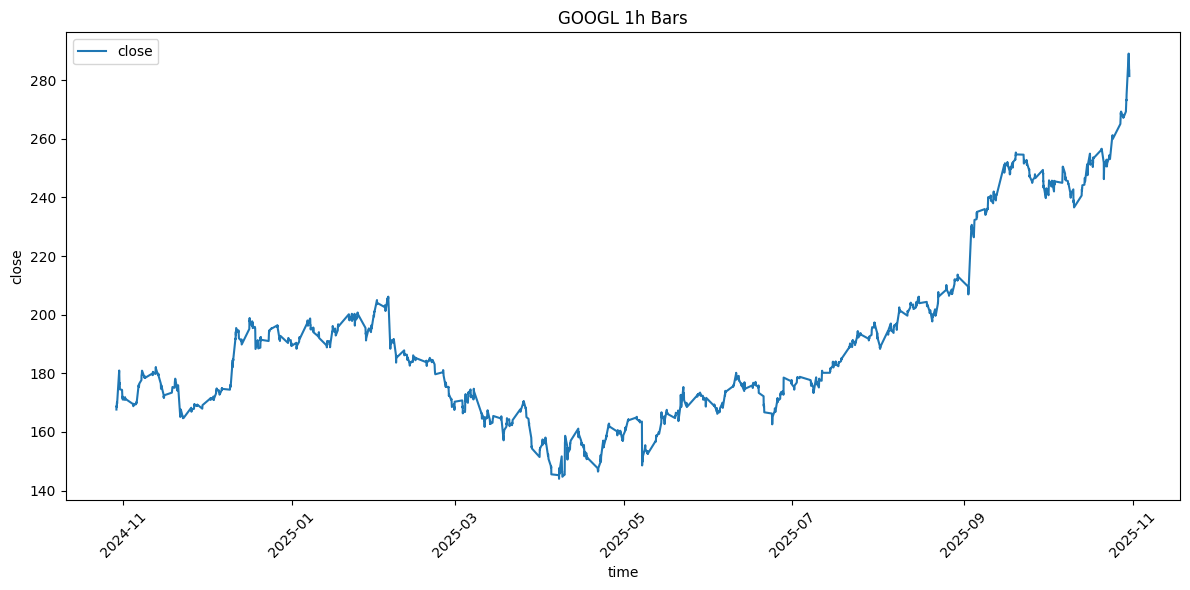

<Figure size 1200x600 with 0 Axes>

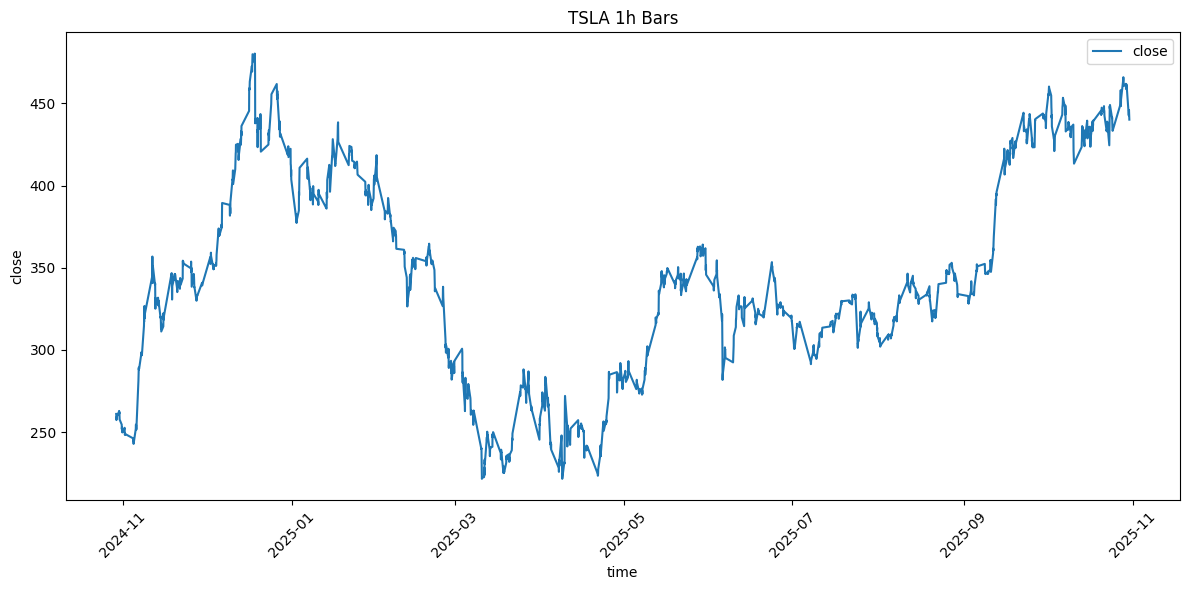

<Figure size 1200x600 with 0 Axes>

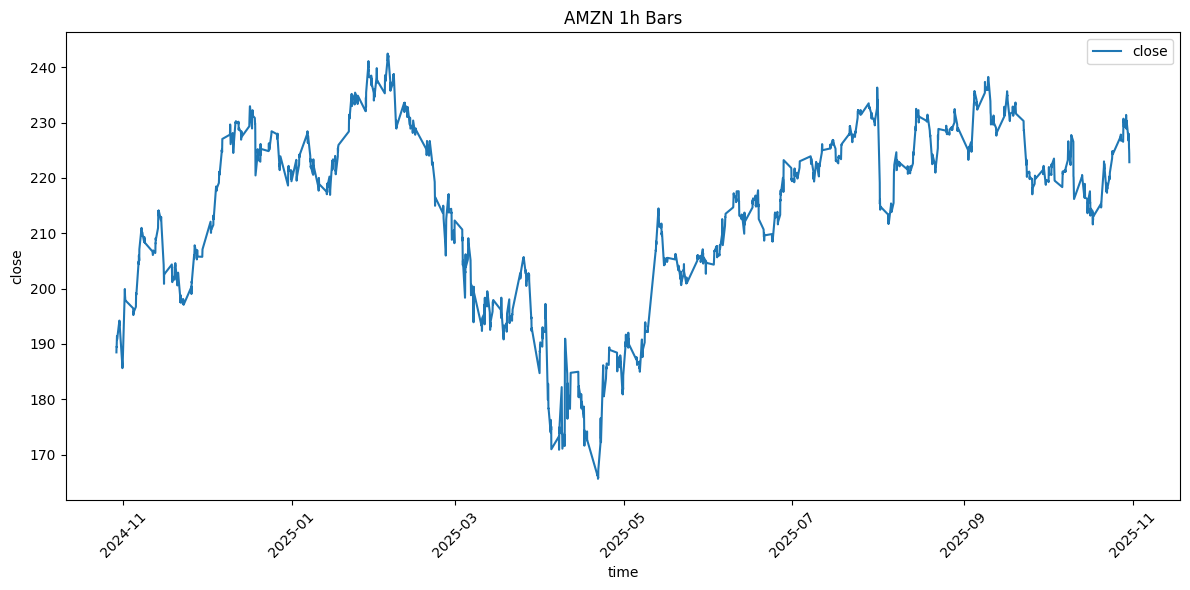

<Figure size 1200x600 with 0 Axes>

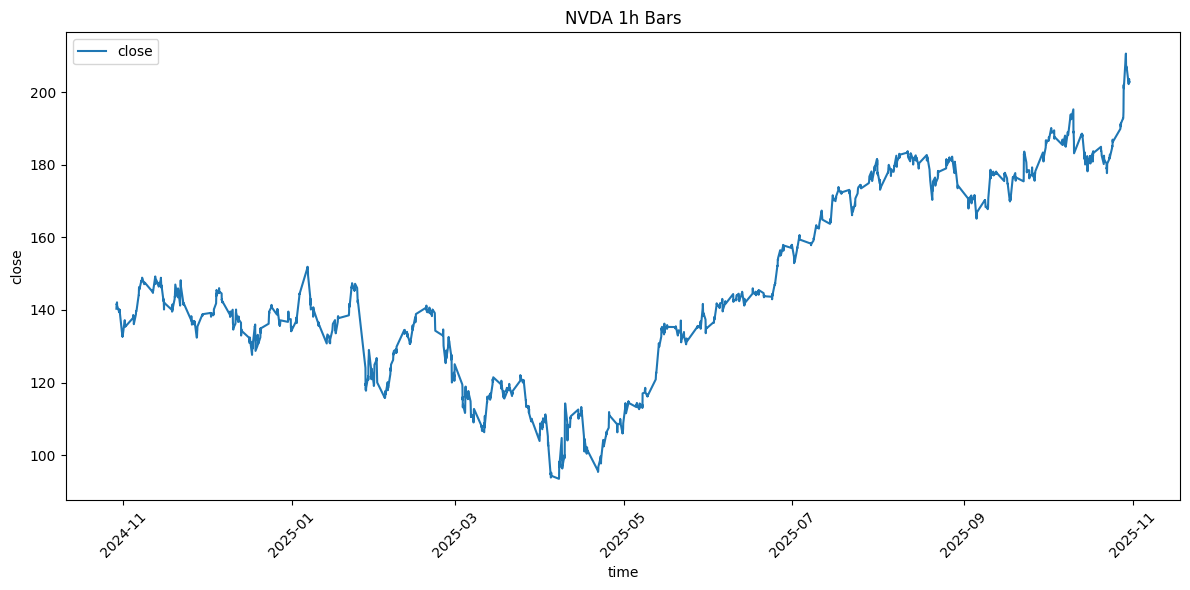

In [29]:
for sym in syms:
    # Create new figure
    plt.figure(figsize=(12, 6))
    
    # Use your existing function
    symbol_data = combined_ts.filter(pl.col('symbol') == sym)
    r2.plot_static_timeseries(symbol_data, sym, 'close', time_interval)
    
    # Show the figure
    plt.show()
    
    # Close the figure to free memory (optional)
    plt.close()

In [53]:
price_time_series = pl.DataFrame({'price':[100.0,120.0,100.0]})
r2.plot_column(price_time_series, 'price')

alt.Chart(...)

In [34]:
price_time_series.with_columns(
    pl.col('price').diff().alias('delta'),
    ((pl.col('price')-pl.col('price').shift())/pl.col('price').shift()).alias('return'),
    (pl.col('price')/pl.col('price').shift()).log().alias('log_return'),
)

price,delta,return,log_return
f64,f64,f64,f64
100.0,null,null,null
120.0,20.0,0.2,0.182322
100.0,-20.0,-0.166667,-0.182322


In [35]:
combined_ts = combined_ts.with_columns((pl.col('close')/pl.col('close').shift(forecast_horizon)).log().alias('close_log_return'))
combined_ts

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64
2024-10-29 13:30:00,233.195007,234.054993,232.320007,233.059998,6668061,0.0,0.0,"""AAPL""",null
2024-10-29 14:30:00,233.050003,233.690002,233.039993,233.270004,3007074,0.0,0.0,"""AAPL""",0.000901
2024-10-29 15:30:00,233.259995,233.589996,233.020096,233.100006,2252024,0.0,0.0,"""AAPL""",-0.000729
2024-10-29 16:30:00,233.104996,234.210007,233.020004,233.889999,2623926,0.0,0.0,"""AAPL""",0.003383
2024-10-29 17:30:00,233.919998,234.139999,233.759995,233.970001,1696611,0.0,0.0,"""AAPL""",0.000342
…,…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA""",0.001746
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA""",-0.001845
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA""",0.002634


In [57]:
target = 'close_log_return'
lr = pl.col(target)
combined_ts = combined_ts.with_columns(
    lr.shift(forecast_horizon * 1).alias(f'{target}_lag_1'),
    lr.shift(forecast_horizon * 2).alias(f'{target}_lag_2'),
    lr.shift(forecast_horizon * 3).alias(f'{target}_lag_3'),
    lr.shift(forecast_horizon * 4).alias(f'{target}_lag_4'),
)
combined_ts

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64
2024-10-29 13:30:00,233.195007,234.054993,232.320007,233.059998,6668061,0.0,0.0,"""AAPL""",null,null,null,null,null
2024-10-29 14:30:00,233.050003,233.690002,233.039993,233.270004,3007074,0.0,0.0,"""AAPL""",0.000901,null,null,null,null
2024-10-29 15:30:00,233.259995,233.589996,233.020096,233.100006,2252024,0.0,0.0,"""AAPL""",-0.000729,0.000901,null,null,null
2024-10-29 16:30:00,233.104996,234.210007,233.020004,233.889999,2623926,0.0,0.0,"""AAPL""",0.003383,-0.000729,0.000901,null,null
2024-10-29 17:30:00,233.919998,234.139999,233.759995,233.970001,1696611,0.0,0.0,"""AAPL""",0.000342,0.003383,-0.000729,0.000901,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA""",0.001746,0.004289,-0.023674,0.000048,0.000483
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA""",-0.001845,0.001746,0.004289,-0.023674,0.000048
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA""",0.002634,-0.001845,0.001746,0.004289,-0.023674


In [58]:
s = r2.add_lags(combined_ts, target, max_lags, forecast_horizon)
combined_ts

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64
2024-10-29 13:30:00,233.195007,234.054993,232.320007,233.059998,6668061,0.0,0.0,"""AAPL""",null,null,null,null,null
2024-10-29 14:30:00,233.050003,233.690002,233.039993,233.270004,3007074,0.0,0.0,"""AAPL""",0.000901,null,null,null,null
2024-10-29 15:30:00,233.259995,233.589996,233.020096,233.100006,2252024,0.0,0.0,"""AAPL""",-0.000729,0.000901,null,null,null
2024-10-29 16:30:00,233.104996,234.210007,233.020004,233.889999,2623926,0.0,0.0,"""AAPL""",0.003383,-0.000729,0.000901,null,null
2024-10-29 17:30:00,233.919998,234.139999,233.759995,233.970001,1696611,0.0,0.0,"""AAPL""",0.000342,0.003383,-0.000729,0.000901,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA""",0.001746,0.004289,-0.023674,0.000048,0.000483
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA""",-0.001845,0.001746,0.004289,-0.023674,0.000048
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA""",0.002634,-0.001845,0.001746,0.004289,-0.023674


In [62]:
combined_ts = combined_ts.drop_nulls()
combined_ts

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64
2024-10-29 18:30:00,233.985001,234.219894,233.880005,234.199997,3638890,0.0,0.0,"""AAPL""",0.000983,0.000342,0.003383,-0.000729,0.000901
2024-10-29 19:30:00,234.205002,234.320007,233.539993,233.75,3460514,0.0,0.0,"""AAPL""",-0.001923,0.000983,0.000342,0.003383,-0.000729
2024-10-30 13:30:00,232.619995,233.229904,231.690002,231.860001,8472341,0.0,0.0,"""AAPL""",-0.008118,-0.001923,0.000983,0.000342,0.003383
2024-10-30 14:30:00,231.866898,231.949997,230.505005,231.554993,5454960,0.0,0.0,"""AAPL""",-0.001316,-0.008118,-0.001923,0.000983,0.000342
2024-10-30 15:30:00,231.559998,231.664993,231.059998,231.199905,3239280,0.0,0.0,"""AAPL""",-0.001535,-0.001316,-0.008118,-0.001923,0.000983
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA""",0.001746,0.004289,-0.023674,0.000048,0.000483
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA""",-0.001845,0.001746,0.004289,-0.023674,0.000048
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA""",0.002634,-0.001845,0.001746,0.004289,-0.023674


ML

In [8]:
class LinearModel(nn.Module):
    def __init__(self, input_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_features, 1)

    def forward(self, x):
        return self.linear(x)

In [9]:
input_features = 1

linear_model = LinearModel(input_features)

r2.print_model_info(linear_model, "Linear Model")
r2.total_model_params(linear_model)


Linear Model

Architecture:
  LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Parameter Count:
  Total parameters:      2
  Trainable parameters:  2



2

In [65]:
features = ['close_log_return_lag_1']
target = 'close_log_return'
test_size = 0.25

In [67]:
print(len(combined_ts))
print(int(len(combined_ts) * test_size))

split_idx = int(len(combined_ts) * (1-test_size))
print(split_idx)

10507
2626
7880


In [68]:
ts_train, ts_test = combined_ts[:split_idx], combined_ts[split_idx:]
ts_train

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64
2024-10-29 18:30:00,233.985001,234.219894,233.880005,234.199997,3638890,0.0,0.0,"""AAPL""",0.000983,0.000342,0.003383,-0.000729,0.000901
2024-10-29 19:30:00,234.205002,234.320007,233.539993,233.75,3460514,0.0,0.0,"""AAPL""",-0.001923,0.000983,0.000342,0.003383,-0.000729
2024-10-30 13:30:00,232.619995,233.229904,231.690002,231.860001,8472341,0.0,0.0,"""AAPL""",-0.008118,-0.001923,0.000983,0.000342,0.003383
2024-10-30 14:30:00,231.866898,231.949997,230.505005,231.554993,5454960,0.0,0.0,"""AAPL""",-0.001316,-0.008118,-0.001923,0.000983,0.000342
2024-10-30 15:30:00,231.559998,231.664993,231.059998,231.199905,3239280,0.0,0.0,"""AAPL""",-0.001535,-0.001316,-0.008118,-0.001923,0.000983
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-05-01 18:30:00,189.960007,191.800003,189.899994,191.684998,7530691,0.0,0.0,"""AMZN""",0.009111,0.000296,0.001787,-0.004259,0.006165
2025-05-01 19:30:00,191.684998,191.807098,189.649994,189.835007,8545036,0.0,0.0,"""AMZN""",-0.009698,0.009111,0.000296,0.001787,-0.004259
2025-05-02 13:30:00,191.490005,192.264999,186.399994,189.610001,29613615,0.0,0.0,"""AMZN""",-0.001186,-0.009698,0.009111,0.000296,0.001787


In [69]:
ts_test

datetime,open,high,low,close,volume,Dividends,Stock Splits,symbol,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4
datetime[μs],f64,f64,f64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64
2025-05-02 16:30:00,192.020004,192.419601,190.300003,190.824997,6001225,0.0,0.0,"""AMZN""",-0.006288,0.014153,-0.001478,-0.001186,-0.009698
2025-05-02 17:30:00,190.822006,191.270004,190.139999,190.945007,4815229,0.0,0.0,"""AMZN""",0.000629,-0.006288,0.014153,-0.001478,-0.001186
2025-05-02 18:30:00,190.945007,191.429993,189.664993,190.369995,4936332,0.0,0.0,"""AMZN""",-0.003016,0.000629,-0.006288,0.014153,-0.001478
2025-05-02 19:30:00,190.350006,190.669998,189.725006,190.0,6168187,0.0,0.0,"""AMZN""",-0.001945,-0.003016,0.000629,-0.006288,0.014153
2025-05-05 13:30:00,186.929993,187.899994,185.529999,187.169403,9392417,0.0,0.0,"""AMZN""",-0.01501,-0.001945,-0.003016,0.000629,-0.006288
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-10-30 15:30:00,203.080002,203.839996,202.059998,203.429901,12480897,0.0,0.0,"""NVDA""",0.001746,0.004289,-0.023674,0.000048,0.000483
2025-10-30 16:30:00,203.429993,203.829895,202.440704,203.054993,9224051,0.0,0.0,"""NVDA""",-0.001845,0.001746,0.004289,-0.023674,0.000048
2025-10-30 17:30:00,203.059998,204.479904,202.779999,203.5905,10066606,0.0,0.0,"""NVDA""",0.002634,-0.001845,0.001746,0.004289,-0.023674


In [70]:
X_train = torch.tensor(ts_train[features].to_numpy(), dtype=torch.float32)
X_test = ts_test[features].to_torch().float()
y_train = torch.tensor(ts_train[target].to_numpy(), dtype=torch.float32)
y_test = torch.tensor(ts_test[target].to_numpy(), dtype=torch.float32)

In [73]:
print(X_train)
print(X_train.shape)


tensor([[ 0.0003],
        [ 0.0010],
        [-0.0019],
        ...,
        [-0.0097],
        [-0.0012],
        [-0.0015]])
torch.Size([7880, 1])


In [77]:
print(y_train.shape)
y_train = y_train.reshape(-1, 1)
print(y_train)
print(y_train.shape)

torch.Size([7880, 1])
tensor([[ 0.0010],
        [-0.0019],
        [-0.0081],
        ...,
        [-0.0012],
        [-0.0015],
        [ 0.0142]])
torch.Size([7880, 1])


In [78]:
y_test = y_test.reshape(-1, 1)
y_test

tensor([[-0.0063],
        [ 0.0006],
        [-0.0030],
        ...,
        [ 0.0026],
        [-0.0051],
        [ 0.0012]])

In [79]:
r2.timeseries_train_test_split(combined_ts, features, target, test_size)

(tensor([[ 0.0003],
         [ 0.0010],
         [-0.0019],
         ...,
         [-0.0097],
         [-0.0012],
         [-0.0015]]),
 tensor([[ 0.0142],
         [-0.0063],
         [ 0.0006],
         ...,
         [-0.0018],
         [ 0.0026],
         [-0.0051]]),
 tensor([[ 0.0010],
         [-0.0019],
         [-0.0081],
         ...,
         [-0.0012],
         [-0.0015],
         [ 0.0142]]),
 tensor([[-0.0063],
         [ 0.0006],
         [-0.0030],
         ...,
         [ 0.0026],
         [-0.0051],
         [ 0.0012]]))

In [ ]:
# TUNE HYPERPARAMS HOWEVER YOU LIKE
no_epochs = 1000 * 5
lr = 0.0005

# create model
model = LinearModel(len(features))
# loss function
criterion = nn.MSELoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr = lr)

print("\nTraining model...")

for epoch in range(no_epochs):
    # forward pass
    y_hat = model(X_train)
    loss = criterion(y_hat, y_train)

    # backward pass
    optimizer.zero_grad()   # 1. clear old gradients
    loss.backward()         # 2. compute new gradients
    optimizer.step()        # 3. update weights

    # check for improvement
    train_loss = loss.item()

    # logging
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{no_epochs}], Loss: {train_loss:.6f}")

print("\nLearned parameters")

for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}:\n{param.data.numpy()}")

# Evaluation
model.eval()
with torch.no_grad():
    y_hat = model(X_test)
    test_loss = criterion(y_hat, y_test)
    print(f"\nTest Loss: {test_loss.item():.6f}, Train Loss: {train_loss:.6f}")